In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
fuel_data = pd.read_csv(url,encoding='latin-1')
fuel_data.describe(include = 'all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_1994_12_1_0_7,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [3]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [4]:
fuel_data.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [5]:
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value = 'mcf')

In [6]:
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [7]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29523 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [8]:
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [9]:
fuel_data.fuel_unit.value_counts()

mcf       11534
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [10]:
fuel_data.groupby('report_year')['report_year'].count()

report_year
1994    1235
1995    1201
1996    1088
1997    1094
1998    1107
1999    1050
2000    1373
2001    1356
2002    1205
2003    1211
2004    1192
2005    1269
2006    1243
2007    1264
2008    1228
2009    1222
2010    1261
2011    1240
2012    1243
2013    1199
2014    1171
2015    1093
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [11]:
fuel_data.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


# Splitting and Merging

In [12]:
fuel_df1 = fuel_data.iloc[0:19000].reset_index(drop=True)
fuel_df2 = fuel_data.iloc[19000:].reset_index(drop=True)

In [13]:
assert len(fuel_data) == (len(fuel_df1)) + (len(fuel_df2))

In [14]:
pd.merge(fuel_df1, fuel_df2, how = 'inner')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu


In [15]:
pd.merge(fuel_df1, fuel_df2, how = 'outer')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [16]:
pd.merge(fuel_df1, fuel_df2, how = 'left')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.210,45.990,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.770,2.770,2.570
...,...,...,...,...,...,...,...,...,...,...,...
18995,f1_fuel_2009_12_182_1_9,182,2009,lake road,gas,mcf,340857.0,1.000000,4.711,4.711,4.711
18996,f1_fuel_2009_12_182_1_10,182,2009,lake road,oil,mcf,771.0,5.801544,84.899,84.899,14.634
18997,f1_fuel_2009_12_182_1_13,182,2009,iatan (18%),coal,ton,414142.0,16.718000,18.509,17.570,1.107
18998,f1_fuel_2009_12_182_1_14,182,2009,iatan (18%),oil,bbl,5761.0,5.537910,83.636,72.280,15.102


In [17]:
pd.merge(fuel_df1, fuel_df2, how = 'right')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_2009_12_79_0_2,79,2009,montrose,oil,bbl,22912.0,5.770422,65.443,67.540,11.341
1,f1_fuel_2009_12_79_0_4,79,2009,hawthorn 5,coal,ton,2408123.0,16.782000,18.598,18.310,1.108
2,f1_fuel_2009_12_79_0_5,79,2009,hawthorn 5,gas,mcf,82141.0,1.000000,6.238,6.238,6.238
3,f1_fuel_2009_12_79_0_7,79,2009,hawthorn 6 & 9,gas,mcf,1701680.0,1.000000,4.885,4.885,4.885
4,f1_fuel_2009_12_79_0_10,79,2009,hawthorn 7 & 8,gas,mcf,82601.0,1.000000,5.383,5.383,5.383
...,...,...,...,...,...,...,...,...,...,...,...
10518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059000,4.780,4.780,9.030
10519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050000,3.650,3.650,6.950
10520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060000,4.770,4.770,8.990
10521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108000,3.060,14.760,1.110


Text(0.5, 0, 'Fuel Unit')

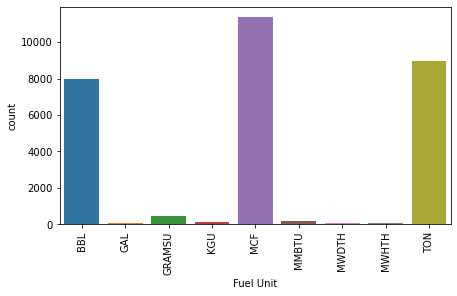

In [19]:
plt.figure(figsize=(7,4))
plt.xticks(rotation = 90)
fuel_unit = pd.DataFrame({'unit':['BBL','GAL','GRAMSU','KGU','MCF','MMBTU','MWDTH','MWHTH','TON'],
                          'count':[7998,84,464,110,11354,180,95,100,8958]})
sns.barplot(data = fuel_unit,x='unit',y='count')
plt.xlabel('Fuel Unit')

Text(0.5, 0, 'Fuel Unit')

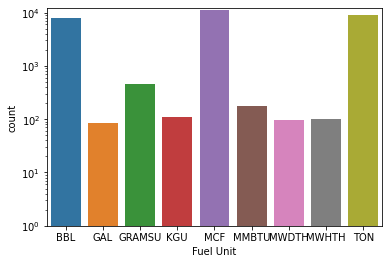

In [21]:
g = sns.barplot(data = fuel_unit, x = 'unit', y = 'count')
g.set_yscale("log")
g.set_ylim(1,12000)
plt.xlabel('Fuel Unit')